In [1]:
import pandas as pd
import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import fftpack
from scipy.signal import stft, find_peaks, medfilt
from typing import Tuple, List

In [2]:
# Load the dataset
url = "daily-new-confirmed-covid-19-cases-per-million-people.csv" #"C:/Users/Dun Yan/Desktop/covid-stft/daily-new-confirmed-covid-19-cases-per-million-people.csv"
data = pd.read_csv(url)
url2 = "new_deaths_per_million.csv"
data2 = pd.read_csv(url2)

country = data[data['Entity']=='Japan']
signal1 = country['Daily new confirmed cases of COVID-19 per million people (rolling 7-day average, right-aligned)'].fillna(0).values
country2 = data[data['Entity']=='United Kingdom']
signal2 = country2['Daily new confirmed cases of COVID-19 per million people (rolling 7-day average, right-aligned)'].fillna(0).values
country3 = data[data['Entity']=='United States']
signal3 = country3['Daily new confirmed cases of COVID-19 per million people (rolling 7-day average, right-aligned)'].fillna(0).values
country_d = data2['Japan']
country_d

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1669    0.0
1670    0.0
1671    0.0
1672    0.0
1673    0.0
Name: Japan, Length: 1674, dtype: float64

In [3]:
#country
print(len(signal1))
print(len(signal2))
print(len(signal3))
#while len(signal3) != len(signal1):
#    signal3 = np.append(signal3, 0)
def proper_normalized_cross_correlation(signal1, signal2, mode="full"):
    """
    Compute normalized cross-correlation according to the standard formula:
    NCC(τ) = r_xy(τ) / √[r_xx(0) * r_yy(0)]
    """
    # Compute cross-correlation for all lags
    cross_corr = scipy.signal.correlate(signal1, signal2, mode=mode)
    
    # Compute zero-lag autocorrelations (r_xx(0) and r_yy(0))
    # These are scalars, not arrays!
    r_xx_0 = np.sum(signal1 * signal1)  # or scipy.signal.correlate(signal1, signal1, "valid")[0]
    r_yy_0 = np.sum(signal2 * signal2)  # or scipy.signal.correlate(signal2, signal2, "valid")[0]
    
    # Normalization factor (constant for all lags)
    norm_factor = np.sqrt(r_xx_0 * r_yy_0)
    
    # Handle division by zero
    if norm_factor == 0:
        norm_factor = 1e-10
    
    # Normalize the entire cross-correlation
    normalized_cc = cross_corr / norm_factor
    
    return normalized_cc

# Usage
ncc1 = proper_normalized_cross_correlation(signal1, signal1, mode="same")
print(max(ncc1))
ncc2 = proper_normalized_cross_correlation(signal2, signal2, mode="same")
print(max(ncc2))
ncc3 = proper_normalized_cross_correlation(signal3, signal3, mode="same")
print(max(ncc3))

2090
2090
1229
1.0
1.0000000000000004
1.0000000000000002


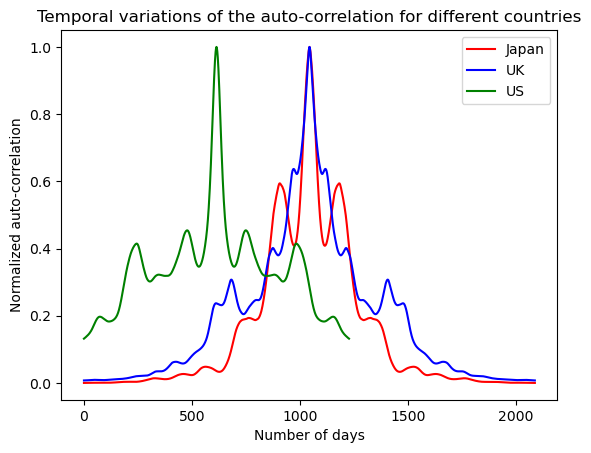

In [4]:
plt.figure()
plt.plot(ncc1, 'r', label="Japan")
plt.plot(ncc2, 'b', label="UK")
plt.plot(ncc3, 'g', label="US")
plt.xlabel("Number of days")
plt.ylabel("Normalized auto-correlation")
plt.title("Temporal variations of the auto-correlation for different countries")
plt.legend()
plt.show()

In [5]:
"""E_x = sum(x**2) / fs  # Energy of x
# Calculate a two-sided STFT with PSD scaling:
f, t, Zxx = signal.stft(x, fs, nperseg=1000, return_onesided=False,
                        scaling='psd')
# Integrate numerically over abs(Zxx)**2:
df, dt = f[1] - f[0], t[1] - t[0]
E_Zxx = sum(np.sum(Zxx.real**2 + Zxx.imag**2, axis=0) * df) * dt
# The energy is the same, but the numerical errors are quite large:
np.isclose(E_x, E_Zxx, rtol=1e-2)"""

"E_x = sum(x**2) / fs  # Energy of x\n# Calculate a two-sided STFT with PSD scaling:\nf, t, Zxx = signal.stft(x, fs, nperseg=1000, return_onesided=False,\n                        scaling='psd')\n# Integrate numerically over abs(Zxx)**2:\ndf, dt = f[1] - f[0], t[1] - t[0]\nE_Zxx = sum(np.sum(Zxx.real**2 + Zxx.imag**2, axis=0) * df) * dt\n# The energy is the same, but the numerical errors are quite large:\nnp.isclose(E_x, E_Zxx, rtol=1e-2)"

Dataset loaded. Entities available: ['Afghanistan' 'Africa' 'Albania' 'Algeria' 'American Samoa' 'Andorra'
 'Angola' 'Anguilla' 'Antigua and Barbuda' 'Argentina'] ...

Analyzing entity: Japan (2090 days: 2020-01-09 -> 2025-09-28)


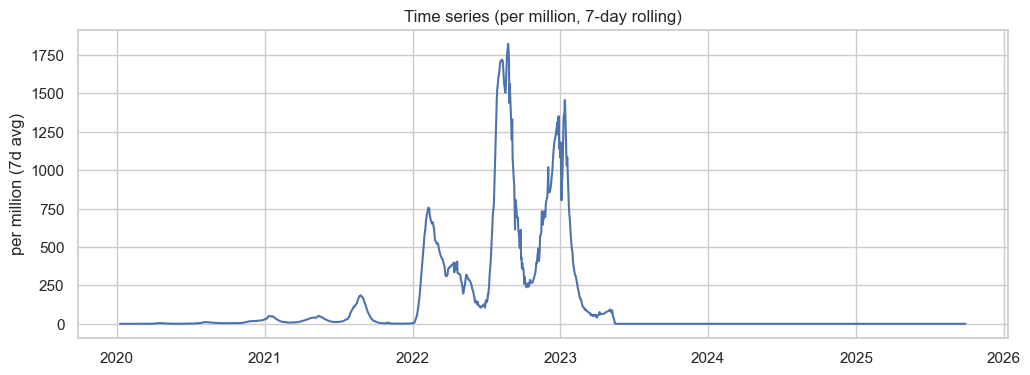

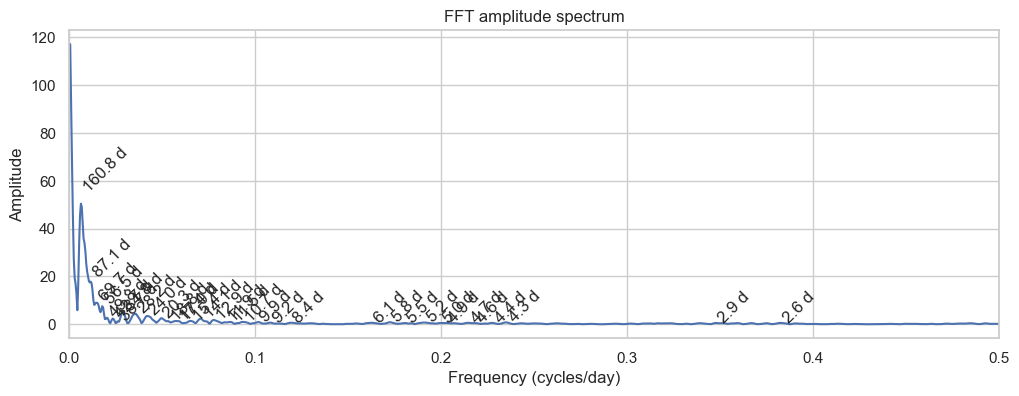

FFT peak frequencies (cycles/day) and approx periods (days):
  freq=0.0062 cyc/day  -> period ≈ 160.8 days, amp=50.433
  freq=0.0115 cyc/day  -> period ≈ 87.1 days, amp=17.855
  freq=0.0144 cyc/day  -> period ≈ 69.7 days, amp=8.997
  freq=0.0177 cyc/day  -> period ≈ 56.5 days, amp=7.538
  freq=0.0201 cyc/day  -> period ≈ 49.8 days, amp=2.678
  freq=0.0234 cyc/day  -> period ≈ 42.7 days, amp=2.396
  freq=0.0258 cyc/day  -> period ≈ 38.7 days, amp=1.176
  freq=0.0287 cyc/day  -> period ≈ 34.8 days, amp=4.991
  freq=0.0354 cyc/day  -> period ≈ 28.2 days, amp=4.431
  freq=0.0416 cyc/day  -> period ≈ 24.0 days, amp=3.426
  freq=0.0493 cyc/day  -> period ≈ 20.3 days, amp=2.519
  freq=0.0531 cyc/day  -> period ≈ 18.8 days, amp=1.334
  freq=0.0574 cyc/day  -> period ≈ 17.4 days, amp=1.389
  freq=0.0589 cyc/day  -> period ≈ 17.0 days, amp=1.302
  freq=0.0651 cyc/day  -> period ≈ 15.4 days, amp=1.374
  freq=0.0708 cyc/day  -> period ≈ 14.1 days, amp=2.324
  freq=0.0775 cyc/day  -> period ≈ 12.9 

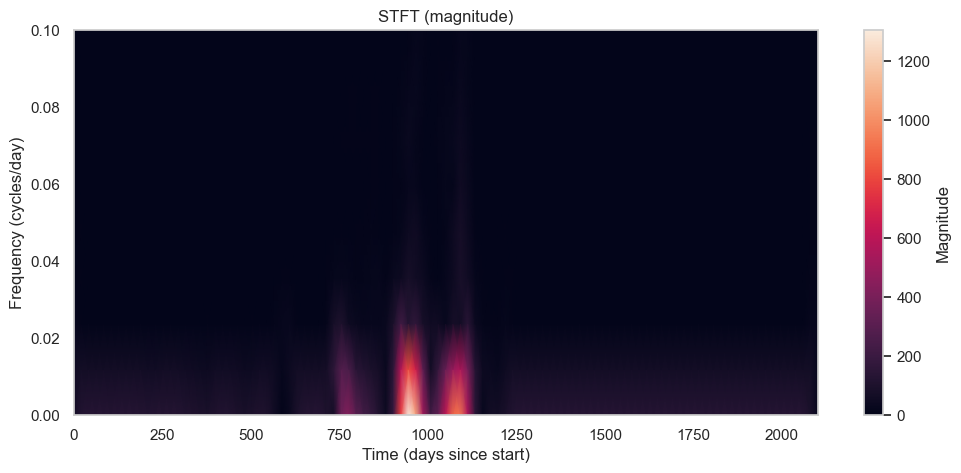


Detected 11 strong spikes (z>=3). Example spike dates: [Timestamp('2022-04-21 00:00:00'), Timestamp('2022-08-25 00:00:00'), Timestamp('2022-08-29 00:00:00'), Timestamp('2022-09-04 00:00:00'), Timestamp('2022-09-25 00:00:00'), Timestamp('2022-11-16 00:00:00'), Timestamp('2022-12-02 00:00:00'), Timestamp('2022-12-28 00:00:00'), Timestamp('2023-01-02 00:00:00'), Timestamp('2023-01-12 00:00:00')]

Pearson correlation between Japan and United States:
                  Japan  United States
Japan          1.000000       0.208958
United States  0.208958       1.000000


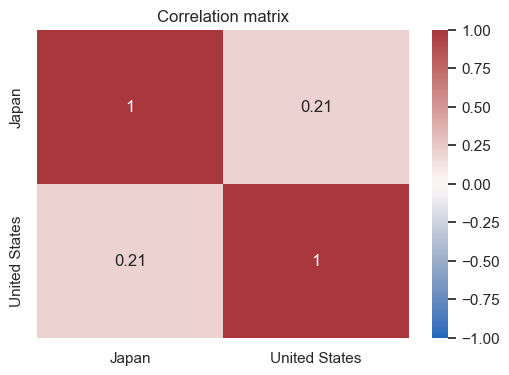


Deaths column not found in dataset; skipping case->death delay estimation. If you have deaths data, include a column named:
  'Daily new confirmed deaths of COVID-19 per million people (rolling 7-day average, right-aligned)'


In [6]:
# covid_analysis_using_provided_column.py
# Requires: pandas, numpy, scipy, matplotlib, seaborn
# pip install pandas numpy scipy matplotlib seaborn

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 5)

# ---------------------------
# Configure column names
# ---------------------------
CASES_COL_RAW = "Daily new confirmed cases of COVID-19 per million people (rolling 7-day average, right-aligned)"
# optional deaths column name (if your dataset has it)
DEATHS_COL_RAW = "Daily new confirmed deaths of COVID-19 per million people (rolling 7-day average, right-aligned)"

# Friendly short names used in analysis
CASES_COL = "new_cases_per_million_7d"
DEATHS_COL = "new_deaths_per_million_7d"

# ---------------------------
# Load dataset (assumes CSV)
# ---------------------------
def load_dataset(path_or_buffer: str) -> pd.DataFrame:
    """
    Load CSV with columns: Entity, Day, <cases column described>.
    Expects Day parseable as date.
    """
    df = pd.read_csv(path_or_buffer)
    # Normalize column names (strip)
    df.columns = [c.strip() for c in df.columns]
    # parse Day -> datetime
    if 'Day' in df.columns:
        df['Day'] = pd.to_datetime(df['Day'])
    elif 'Date' in df.columns:
        df['Day'] = pd.to_datetime(df['Date'])
    else:
        raise ValueError("No 'Day' or 'Date' column found. Please provide a date column named 'Day' or 'Date'.")
    # rename columns if present
    if CASES_COL_RAW in df.columns:
        df = df.rename(columns={CASES_COL_RAW: CASES_COL})
    else:
        raise ValueError(f"Cases column not found. Expected column name: '{CASES_COL_RAW}'")
    if DEATHS_COL_RAW in df.columns:
        df = df.rename(columns={DEATHS_COL_RAW: DEATHS_COL})
    # ensure 'Entity' exists
    if 'Entity' not in df.columns:
        raise ValueError("No 'Entity' column found (expected one describing country/region).")
    return df

# ---------------------------
# Helper: extract per-entity series
# ---------------------------
def series_for_entity(df: pd.DataFrame, entity: str, value_col: str = CASES_COL, fillna: bool = True) -> pd.Series:
    sub = df[df['Entity'] == entity].sort_values('Day').set_index('Day')
    if fillna:
        # these are already 7-day rolling per description, but fill small missing values
        sub[value_col] = sub[value_col].fillna(0)
    s = sub[value_col].astype(float)
    return s

# ---------------------------
# Periodicity via FFT + STFT
# ---------------------------
def detect_periodic_components_fft(series: pd.Series, fs: float = 1.0, show_plot: bool = True) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """
    Return freqs, amps, peak_freqs, peak_amps.
    fs: sampling frequency in samples/day (1.0 for daily).
    """
    x = series.fillna(0).values #padding zero values
    n = len(x)
    x_d = x - np.nanmean(x)
    yf = fftpack.fft(x_d) #DFT computed using FFT
    xf = fftpack.fftfreq(n, d=1.0/fs) #DFT sample frequencies
    pos = xf > 0
    freqs = xf[pos]
    amps = np.abs(yf[pos]) / n
    # pick peaks in amplitude spectrum (tunable)
    peak_idx, _ = find_peaks(amps, height=np.percentile(amps, 75))
    peak_freqs = freqs[peak_idx]
    peak_amps = amps[peak_idx]
    if show_plot:
        plt.figure(figsize=(12,4))
        plt.plot(series.index, series.values)
        plt.title("Time series (per million, 7-day rolling)")
        plt.ylabel("per million (7d avg)")
        plt.show()
        plt.figure(figsize=(12,4))
        plt.plot(freqs, amps)
        plt.title("FFT amplitude spectrum")
        plt.xlim(0, 0.5)  # show low-frequency range (period >= 2 days)
        plt.xlabel("Frequency (cycles/day)")
        plt.ylabel("Amplitude")
        for f,a in zip(peak_freqs, peak_amps):
            period_days = 1.0/f if f>0 else np.inf
            plt.annotate(f"{period_days:.1f} d", xy=(f,a), xytext=(f, a*1.1), rotation=45)
        plt.show()
    return freqs, amps, peak_freqs, peak_amps

def visualize_stft(series: pd.Series, fs: float = 1.0, nperseg: int = 56, noverlap: int = 28, show_plot: bool = True):
    x = series.fillna(0).values
    f, t, Zxx = stft(x - np.nanmean(x), fs=fs, window='hann', nperseg=nperseg, noverlap=noverlap, boundary='zeros')
    if show_plot:
        plt.figure(figsize=(12,5))
        plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
        plt.ylim(0, 0.1)
        plt.xlabel("Time (days since start)")
        plt.ylabel("Frequency (cycles/day)")
        plt.title("STFT (magnitude)")
        plt.colorbar(label='Magnitude')
        plt.show()
    return f, t, Zxx

# ---------------------------
# Transient spike detection
# ---------------------------
def detect_spikes(series: pd.Series, med_window: int = 7, z_thresh: float = 3.0, min_prominence: float = 0.5) -> dict:
    """
    Returns dict with:
     - spike_indices (list of integer positions)
     - spike_dates (list of pd.Timestamp)
     - residual, baseline, zscore arrays
    min_prominence is in same units as series (per-million). Adjust to dataset scale.
    """
    arr = series.fillna(0).values
    # ensure odd kernel for medfilt
    k = med_window if med_window % 2 == 1 else med_window + 1
    baseline = medfilt(arr, kernel_size=k)
    residual = arr - baseline
    mad = np.median(np.abs(residual - np.median(residual)))
    if mad == 0:
        mad = np.std(residual) if np.std(residual) > 0 else 1.0
    zscore = residual / (1.4826 * mad)
    peaks_all, props = find_peaks(residual, prominence=min_prominence)
    # filter by z-score threshold
    peaks_filtered = [p for p in peaks_all if abs(zscore[p]) >= z_thresh]
    return {
        'peaks_indices': peaks_filtered,
        'peaks_dates': [series.index[p] for p in peaks_filtered],
        'residual': residual,
        'baseline': baseline,
        'zscore': zscore,
        'all_peaks_indices': peaks_all,
        'all_props': props
    }

# ---------------------------
# Correlation across entities (Pearson)
# ---------------------------
def correlation_matrix(df: pd.DataFrame, entities: List[str], value_col: str = CASES_COL) -> pd.DataFrame:
    # Build aligned DataFrame (index = union of dates)
    frames = []
    for e in entities:
        s = series_for_entity(df, e, value_col=value_col)
        s = s.rename(e)
        frames.append(s)
    big = pd.concat(frames, axis=1).fillna(0)
    corr = big.corr(method='pearson')
    return corr

# ---------------------------
# Cross-correlation delay estimation (only if deaths column exists)
# ---------------------------
def estimate_delay_between(series_a: pd.Series, series_b: pd.Series, max_lag_days: int = 60, show_plot: bool = True) -> Tuple[int, np.ndarray, np.ndarray]:
    """
    Returns best_lag (int) where positive means series_a leads series_b.
    Both series must be same index/length; function will intersect indices.
    """
    idx = series_a.index.intersection(series_b.index)
    a = series_a.loc[idx].fillna(0).values - np.nanmean(series_a.loc[idx].fillna(0).values)
    b = series_b.loc[idx].fillna(0).values - np.nanmean(series_b.loc[idx].fillna(0).values)
    corr_full = np.correlate(a, b, mode='full')
    lags = np.arange(-len(a)+1, len(a))
    mask = (lags >= -max_lag_days) & (lags <= max_lag_days)
    lags_sub = lags[mask]
    corr_sub = corr_full[mask]
    best_idx = np.argmax(corr_sub)
    best_lag = int(lags_sub[best_idx])
    if show_plot:
        plt.figure(figsize=(10,4))
        plt.plot(lags_sub, corr_sub)
        plt.axvline(best_lag, color='red', linestyle='--', label=f'best lag = {best_lag} days')
        plt.xlabel('Lag (days) -- positive means series A leads B')
        plt.title('Cross-correlation')
        plt.legend()
        plt.show()
    return best_lag, lags_sub, corr_sub

# ---------------------------
# Example pipeline
# ---------------------------
def run_pipeline(path_or_buffer: str, entity_a: str, entity_b: str = None):
    df = load_dataset(path_or_buffer)
    print(f"Dataset loaded. Entities available: {df['Entity'].unique()[:10]} ...")

    s_a = series_for_entity(df, entity_a, value_col=CASES_COL)
    print(f"\nAnalyzing entity: {entity_a} ({len(s_a)} days: {s_a.index.min().date()} -> {s_a.index.max().date()})")

    # 1) Periodicity
    freqs, amps, peak_freqs, peak_amps = detect_periodic_components_fft(s_a, show_plot=True)
    print("FFT peak frequencies (cycles/day) and approx periods (days):")
    for f,a in zip(peak_freqs, peak_amps):
        print(f"  freq={f:.4f} cyc/day  -> period ≈ {1.0/f:.1f} days, amp={a:.3f}")

    # 2) STFT
    _ = visualize_stft(s_a, nperseg=84, noverlap=63, show_plot=True)

    # 3) Spike detection
    spikes = detect_spikes(s_a, med_window=7, z_thresh=3.0, min_prominence=0.5)
    print(f"\nDetected {len(spikes['peaks_indices'])} strong spikes (z>=3). Example spike dates: {spikes['peaks_dates'][:10]}")

    # 4) Correlation across entities if entity_b provided
    if entity_b:
        corr = correlation_matrix(df, [entity_a, entity_b], value_col=CASES_COL)
        print(f"\nPearson correlation between {entity_a} and {entity_b}:")
        print(corr)
        # optional heatmap
        plt.figure(figsize=(6,4))
        sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap='vlag')
        plt.title("Correlation matrix")
        plt.show()

    # 5) Delay between cases and deaths if deaths column exists
    if DEATHS_COL in df.columns:
        if entity_b is None:
            # use same entity for deaths
            s_deaths = series_for_entity(df, entity_a, value_col=DEATHS_COL)
            best_lag, lags_sub, corr_sub = estimate_delay_between(s_a, s_deaths, max_lag_days=60, show_plot=True)
            print(f"Estimated lag (cases lead deaths) for {entity_a}: {best_lag} days")
        else:
            # user asked for two entities; we still compute cases->deaths for entity_a if available
            s_deaths = series_for_entity(df, entity_a, value_col=DEATHS_COL)
            best_lag, lags_sub, corr_sub = estimate_delay_between(s_a, s_deaths, max_lag_days=60, show_plot=True)
            print(f"Estimated lag (cases lead deaths) for {entity_a}: {best_lag} days")
    else:
        print("\nDeaths column not found in dataset; skipping case->death delay estimation. If you have deaths data, include a column named:")
        print(f"  '{DEATHS_COL_RAW}'")

    return {
        'series': s_a,
        'fft': (freqs, amps, peak_freqs, peak_amps),
        'stft': None,  # returned in visualize if needed
        'spikes': spikes,
        'corr_matrix': corr if entity_b else None
    }

# ---------------------------
# Example usage (uncomment to run)
# ---------------------------
# results = run_pipeline("C:/Users/Dun Yan/Desktop/covid-stft/daily-new-confirmed-covid-19-cases-per-million-people.csv", entity_a="United States", entity_b="United Kingdom")
# If you only have cases and want per-entity run:
results = run_pipeline(url, entity_a = "Japan", entity_b = "United States")#("C:/Users/Dun Yan/Desktop/covid-stft/daily-new-confirmed-covid-19-cases-per-million-people.csv", entity_a="Japan")


In [23]:
# Load the dataset
url = "daily-new-confirmed-covid-19-cases-per-million-people.csv" #"C:/Users/Dun Yan/Desktop/covid-stft/daily-new-confirmed-covid-19-cases-per-million-people.csv"
data = pd.read_csv(url)
url2 = "new_deaths_per_million.csv"
data2 = pd.read_csv(url2)

country = data[data['Entity']=='Japan']
signal1 = country['Daily new confirmed cases of COVID-19 per million people (rolling 7-day average, right-aligned)'].fillna(0).values
country2 = data[data['Entity']=='United Kingdom']
signal2 = country2['Daily new confirmed cases of COVID-19 per million people (rolling 7-day average, right-aligned)'].fillna(0).values
country3 = data[data['Entity']=='United States']
signal3 = country3['Daily new confirmed cases of COVID-19 per million people (rolling 7-day average, right-aligned)'].fillna(0).values
country_d1 = data2['Japan']
country_d2 = data2['United Kingdom']
country_d3 = data2['United States']

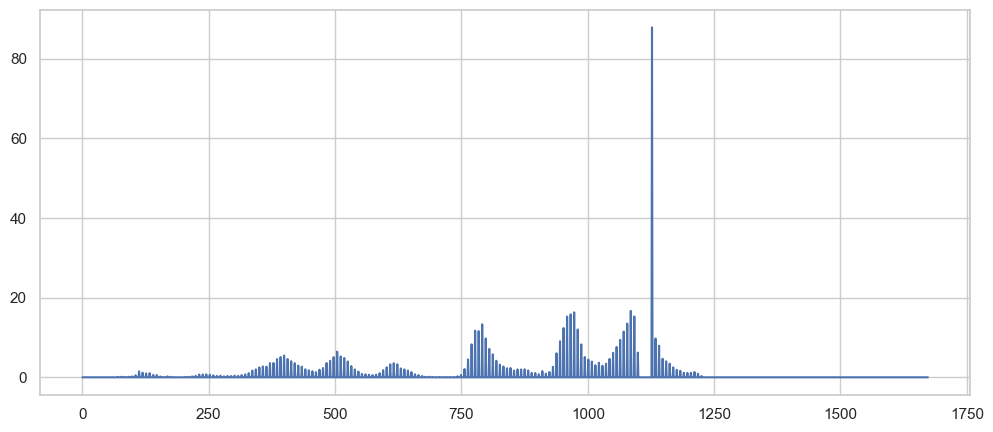

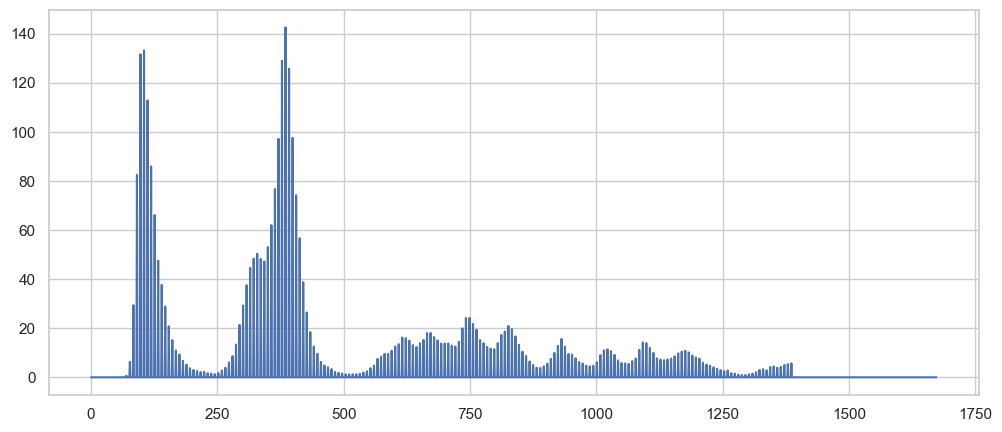

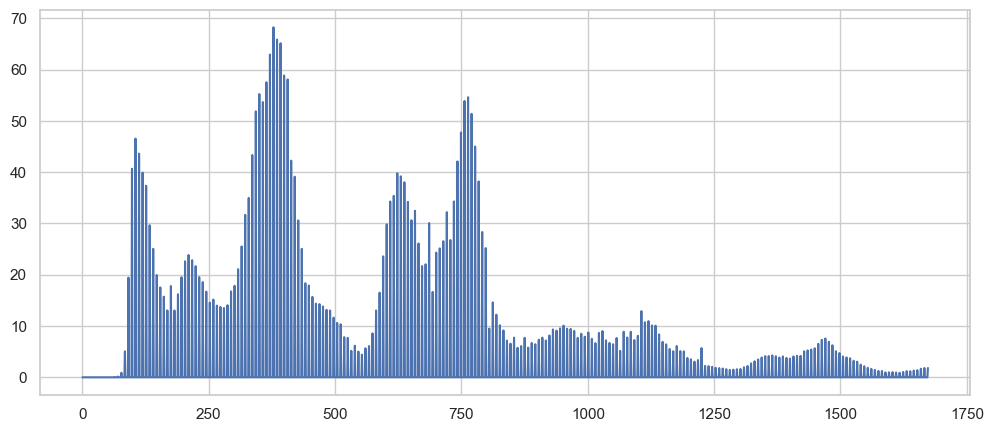

In [22]:
plt.figure()
plt.plot(country_d1, 'b')
plt.show()
plt.figure()
plt.plot(country_d2, 'b')
plt.show()
plt.figure()
plt.plot(country_d3, 'b')
plt.show()

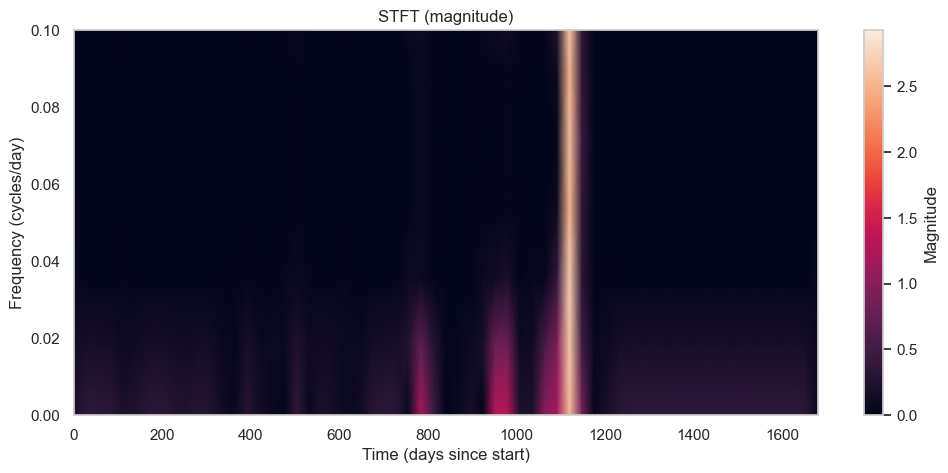

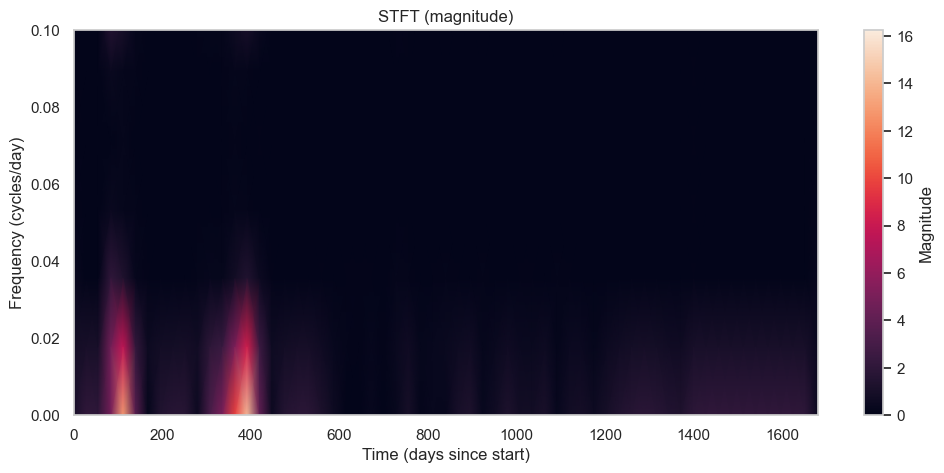

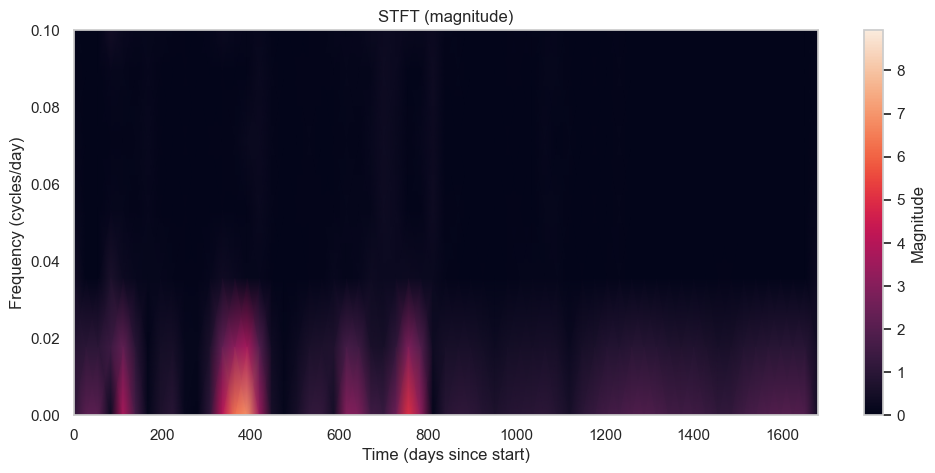

(array([0.        , 0.01785714, 0.03571429, 0.05357143, 0.07142857,
        0.08928571, 0.10714286, 0.125     , 0.14285714, 0.16071429,
        0.17857143, 0.19642857, 0.21428571, 0.23214286, 0.25      ,
        0.26785714, 0.28571429, 0.30357143, 0.32142857, 0.33928571,
        0.35714286, 0.375     , 0.39285714, 0.41071429, 0.42857143,
        0.44642857, 0.46428571, 0.48214286, 0.5       ]),
 array([   0.,   28.,   56.,   84.,  112.,  140.,  168.,  196.,  224.,
         252.,  280.,  308.,  336.,  364.,  392.,  420.,  448.,  476.,
         504.,  532.,  560.,  588.,  616.,  644.,  672.,  700.,  728.,
         756.,  784.,  812.,  840.,  868.,  896.,  924.,  952.,  980.,
        1008., 1036., 1064., 1092., 1120., 1148., 1176., 1204., 1232.,
        1260., 1288., 1316., 1344., 1372., 1400., 1428., 1456., 1484.,
        1512., 1540., 1568., 1596., 1624., 1652., 1680.]),
 array([[-1.08073599e+00+0.00000000e+00j, -2.08693847e+00+0.00000000e+00j,
         -2.07793793e+00+0.00000000e+00j, 

In [9]:
visualize_stft(country_d1)
visualize_stft(country_d2)
visualize_stft(country_d3)

In [48]:
signal_d1 = country_d1.fillna(0).values
signal_d2 = country_d2.fillna(0).values
signal_d3 = country_d3.fillna(0).values

In [49]:
while len(signal_d1) != len(signal1):
    signal_d1 = np.append(signal_d1, 0)
while len(signal_d2) != len(signal2):
    signal_d2 = np.append(signal_d2, 0)
while len(signal3) != len(signal_d3):
    signal3 = np.append(signal3, 0)

In [57]:
ncc1 = proper_normalized_cross_correlation(signal1, signal_d1, mode="same")
print(max(ncc1))
ncc2 = proper_normalized_cross_correlation(signal2, signal_d2, mode="same")
print(max(ncc2))
ncc3 = proper_normalized_cross_correlation(signal3, signal_d3, mode="same")
print(max(ncc3))

cross_corr1 = scipy.signal.correlate(signal1, signal_d1, mode="same")
max_lag = max(abs(cross_corr1))/(24*60*60) #problem: using normalized cross correlation
print(max_lag)
cross_corr2 = scipy.signal.correlate(signal2, signal_d2, mode="same")
max_lag = max(abs(cross_corr2))/(24*60*60) #problem: using normalized cross correlation
print(max_lag)
cross_corr3 = scipy.signal.correlate(signal3, signal_d3, mode="same")
max_lag = max(abs(cross_corr3))/(24*60*60) #problem: using normalized cross correlation
print(max_lag)

0.24649983505065012
0.2530429819105262
0.29765201623200044
4.737200564119964
23.968205831381184
16.134445548769556


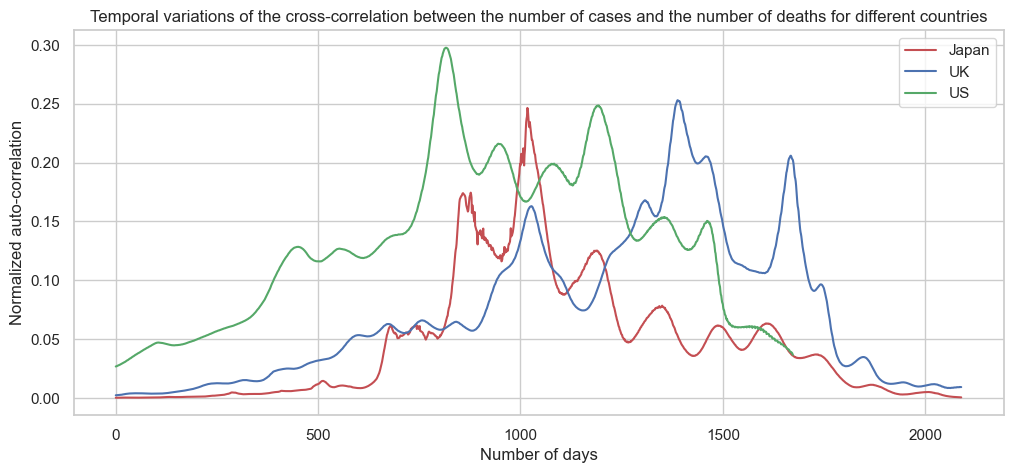

In [51]:
plt.figure()
plt.plot(ncc1, 'r', label="Japan")
plt.plot(ncc2, 'b', label="UK")
plt.plot(ncc3, 'g', label="US")
plt.xlabel("Number of days")
plt.ylabel("Normalized auto-correlation")
plt.title("Temporal variations of the cross-correlation between the number of cases and the number of deaths for different countries")
plt.legend()
plt.show()

In [32]:
ncc1 = proper_normalized_cross_correlation(signal_d1, signal_d1, mode="same")
print(max(ncc1))
ncc2 = proper_normalized_cross_correlation(signal_d2, signal_d2, mode="same")
print(max(ncc2))
ncc3 = proper_normalized_cross_correlation(signal_d3, signal_d3, mode="same")
print(max(ncc3))

0.9999999999999999
0.9999999999999999
0.9999999999999999


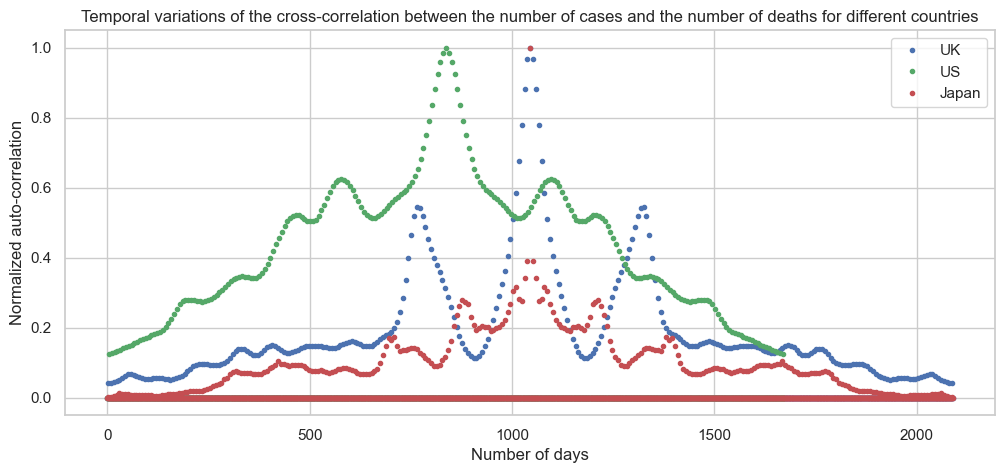

In [36]:
plt.figure()
plt.plot(ncc2, 'b.', label="UK")
plt.plot(ncc3, 'g.', label="US")
plt.plot(ncc1, 'r.', label="Japan")
plt.xlabel("Number of days")
plt.ylabel("Normalized auto-correlation")
plt.title("Temporal variations of the cross-correlation between the number of cases and the number of deaths for different countries")
plt.legend()
plt.show()